In [1]:
# A comparing of performance between numpy and cvxpy, it will be performed by solving a system of linear equations of different sizes with random coefficients, after that will draw a graph of the runtime as a function of the size of the system.
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
import random as rnd
import time as tm
import math as m


In [2]:
# Function which generates a system of linear equations of different sizes with random coefficients and returns them.
def generate_a_system_of_linear_equations(n=rnd.randint(1, 1000)):
    A = np.random.rand(n, n)
    b = np.random.rand(n)
    return A, b

In [3]:
# Function which solves a system of linear equations using numpy and returns the runtime.
def solve_a_system_of_linear_equations_using_numpy(A, b):
    start_time = tm.time()
    x = np.linalg.solve(A, b)
    end_time = tm.time()
    return x, end_time - start_time

In [4]:
# Function which solves a system of linear equations using cvxpy and returns the runtime.
def solve_a_system_of_linear_equations_using_cvxpy(A, b):
    start_time = tm.time()
    x = cp.Variable(A.shape[1])
    objective = cp.Minimize(cp.sum_squares(A @ x - b))
    constraints = []
    prob = cp.Problem(objective, constraints)
    prob.solve()
    end_time = tm.time()
    return x.value, end_time - start_time

In [5]:
# Function which draws a graph of the runtime as a function of the size of the system n is a vector of numbers, numpy_runtime is a vector of numbers representing the runtime of solving the system using numpy.
def draw_a_graph_of_the_runtime_as_a_function_of_the_size_of_the_system(n, numpy_runtime, cvxpy_runtime):
    plt.plot(n, numpy_runtime, label='numpy')
    plt.plot(n, cvxpy_runtime, label='cvxpy')
    plt.xlabel('n')
    plt.ylabel('runtime')
    plt.legend()
    plt.show()

In [6]:
# Function receives a list of numbers and for each cell in the list calculates the sum.
def calc_sum(list):
    sum = []
    for cell in list:
        sum.append(np.sum(cell))
    return sum

In [7]:
# Function which receives a vector of numbers of numbers and a vector of booleans and draws a graph of the numbers as a function of the booleans.
def draw_a_graph_of_the_n_as_a_function_of_the_matching(n,match):
    match= calc_sum(match)
    plt.plot(n, match, label='Difference between the two solutions')
    plt.xlabel('n')
    plt.ylabel('match')
    plt.legend()
    plt.show()

In [8]:
# Function which runs the program.
def check():
    n = []
    numpy_runtime = []
    cvxpy_runtime = []
    match = []
    for i in range(1, 1000):
        A, b = generate_a_system_of_linear_equations(i)
        n.append(i)
        x, runtime = solve_a_system_of_linear_equations_using_numpy(A, b)
        numpy_runtime.append(runtime)
        solution, runtime = solve_a_system_of_linear_equations_using_cvxpy(A, b)
        cvxpy_runtime.append(runtime)
        match.append(abs(x - solution))
    draw_a_graph_of_the_runtime_as_a_function_of_the_size_of_the_system(n, numpy_runtime, cvxpy_runtime)
    draw_a_graph_of_the_n_as_a_function_of_the_matching(n, match)

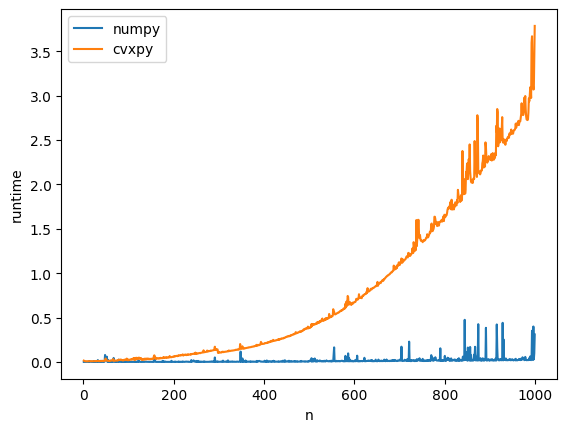

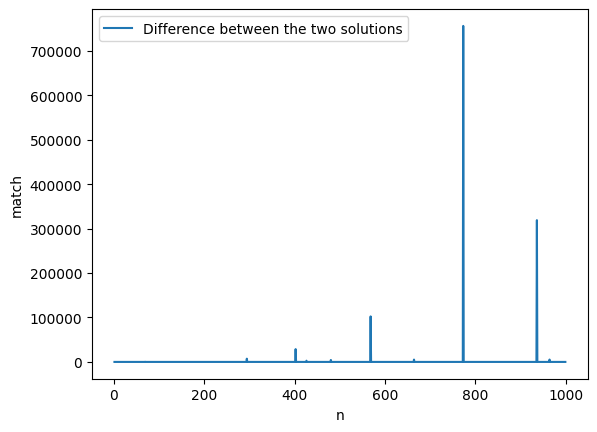

In [9]:
check()